# Projet Quantique : Algorithmes quantiques pour le problème de collision

In [2]:
%pip install pennylane
%pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pennylane as qml
import random as rd
import scipy as sc
import matplotlib.pyplot as plt
import numpy as np

## Introduction 
blabla blou c'est super les hashs

## Étude théorique du problème de collision en quantique 

Dans le but de trouver des collisions dans des algorithmes de Hashage, notre première piste a été de regarder le papier suivant : *Quantum Cryptanalysis of Hash and Claw-Free Functions* par Gilles Brassard, Peter HØyer & Alain Tapp.

Afin d'arriver à trouver des collisions, on commence par assimiler nos fonctions de hashage à des **fonction two to one**, soit des fonctions qui pour une sortie ont exactement deux entrées. Cette approximation fait sens puisque du fait que les sorties des fonctions de hashage ont une taille fixe plus petite que les entrées, on va forcément avoir plusieurs entrées avec la même sortie. Trouver une collision va donc correspondre a trouver $x0,x1$ qui valident la propriété suivante $ x0 \ne x1,f(x0)=f(x1)$.

Avec un domaine d'entrée $X$ de cardinalité $N$, on a donc un une cardinalité sur notre espace de sortie de $ \sqrt{N} $. On peut donc trouver notre collision avec $O(\sqrt{N})$ évaluation de la fonction $f$. 

La méthode quantique théorique proposé permet d'arriver à $O(\sqrt[3]{N})$ évaluation de la fonction $f$. Voici l'algorithme : 

- On sélectionne $k = \sqrt[3]{N}$ élément parmi $X$. On construit ensuite une table $L$ qui contient les paires $(x,f(x))$.

- Une fois la liste $L$ obtenue, on la trie selon le deuxième élément, soit $f(x)$. On peut donc facilement savoir si des collisions sont déjà obtenues, si c'est le cas on renvoit juste la collision ${x0,x1}$ et l'algorithme est terminé. 

- Si aucune collision n'est obtenue, on applique l'algorithme de Grover avec l'oracle $H$ suivant :

    Pour $x0$ comprise dans la liste $L$, l'oracle $H$ renvoit 1 pour $x1$ qui valident la propriété suivante : $,x1 \ne x0, f(x1) = f(x0)$

- On renvoie ensuite la collision ${x0,x1}$. 

On va donc faire $k$ évaluation de l'oracle pour construire $L$, puis en moyenne $k\sqrt{N}$ pour Grover. avec $k = \sqrt[3]{N}$ on à donc comme complexité temporelle $O(\sqrt[3]{N})$ évalations de f. 
De la même manière que Grover est extensible pour des oracles marquant plusieurs entrées, on peut étendre l'algorithme de collision quantique pour n'importe quelle **fonction r to one** avec $O(\sqrt[3]{\frac{N}{r}})$.

La raison pour laquelle l'algorithme est théorique et ne peut pas être appliquer réellement en quantique réside dans l'utilisation de la mémoire : on va avoir besoin de $k$ qubits pour stocker L, provoquant un coût en mémoire de $O(\sqrt[3]{\frac{N}{r}})$, beaucoup trop cher en quantique. 

## Application logiciel du problème de collision en quantique 
o no c'est tro gro

## Cas pratique : Algorithme de Simon sur un hash custom


ptite phrase tavu

#### Construction du hash

youpi les haches



In [4]:

"""
Fonction qui affiche le résultat d'un circuit sous forme de graphique.
"""
def plot_samples(samples, num_qubits):
    # Comptage des occurrences de chaque état
    counts = np.unique(samples, return_counts=True, axis=0)

    # Conversion des états binaires en entiers pour les étiquettes sur l'axe des x
    state_labels = [int("".join(str(x) for x in state), 2) for state in counts[0]]

    # Génération de toutes les combinaisons possibles d'états de qubits
    all_states = [format(i, f'0{num_qubits}b') for i in range(2**num_qubits)]

    # Filtrage des états ayant des résultats
    state_labels_with_results = [state for state in all_states if int(state, 2) in state_labels]

    # Mappage des états filtrés avec leurs occurrences
    filtered_counts = [counts[1][state_labels.index(int(state, 2))] for state in state_labels_with_results]

    # Affichage des résultats sous forme d'un diagramme à barres
    plt.bar(range(len(state_labels_with_results)), filtered_counts)
    plt.xlabel('États')
    plt.ylabel('Nombre d\'échantillons')
    plt.xticks(range(len(state_labels_with_results)), state_labels_with_results)
    plt.title('Résultats du circuit')
    plt.show()

In [5]:


class HashFunction(qml.operation.Operation):
    # Define how many wires the operator acts on in total.
    # In our case this may be one or two, which is why we
    # use the AnyWires Enumeration to indicate a variable number.
    num_wires = qml.operation.AnyWires
    
    @staticmethod
    def compute_decomposition(n,m,wires):  # pylint: disable=arguments-differ
        # Overwriting this method defines the decomposition of the new gate, as it is
        # called by Operator.decomposition().
        # The general signature of this function is (*parameters, wires, **hyperparameters).
        input_wires,output_wires = wires[:n],wires[n:2*n]
        nstates = 2**n

        
        
        for row in range(nstates):
            for column in range(nstates):
                if (m[row][column] == 1):
                    outputlist = []
                    output = f'{column:0{n}b}'
                    for i in range(n):
                        if(output[i]=='1'):
                            outputlist.append(output_wires[i])
                    for wire in outputlist : 
                        qml.MultiControlledX(input_wires,wire,f'{row:0{n}b}')


In [6]:
class Reductor(qml.operation.Operation):
    # Define how many wires the operator acts on in total.
    # In our case this may be one or two, which is why we
    # use the AnyWires Enumeration to indicate a variable number.
    num_wires = qml.operation.AnyWires
    
    @staticmethod
    def compute_decomposition(n,b,i,wires):  # pylint: disable=arguments-differ
        # Overwriting this method defines the decomposition of the new gate, as it is
        # called by Operator.decomposition().
        # The general signature of this function is (*parameters, wires, **hyperparameters).
        
        qml.CNOT(wires = (wires[i],wires[-1]))

        for c in range(len(b)):
            if b[c]=='1':
                qml.CNOT(wires = (wires[-1],wires[c]))

class inverse_Reductor(qml.operation.Operation):
    # Define how many wires the operator acts on in total.
    # In our case this may be one or two, which is why we
    # use the AnyWires Enumeration to indicate a variable number.
    num_wires = qml.operation.AnyWires
    
    @staticmethod
    def compute_decomposition(n,b,i,wires):  # pylint: disable=arguments-differ
        # Overwriting this method defines the decomposition of the new gate, as it is
        # called by Operator.decomposition().
        # The general signature of this function is (*parameters, wires, **hyperparameters).

        for c in range(len(b)):
            if b[c]=='1':
                qml.CNOT(wires = (wires[-1],wires[c]))

        qml.CNOT(wires = (wires[i],wires[-1]))

                
        

        

10010 0


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\pennylane\ops\qubit\non_parametric_ops.py:2094: UserWarning: The control_wires keyword will be removed soon. Use wires = (control_wires, target_wire) instead. See the documentation for more information.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\pennylane\ops\qubit\non_parametric_ops.py:2094: UserWarning: The control_wires keyword will be removed soon. Use wires = (control_wires, target_wire) instead. See the documentation for more information.
  warnings.warn(


(0, 0, 0, 0, 0)
(0, 0, 1, 0, 0)
(0, 0, 0, 0, 1)
(0, 1, 0, 0, 0)
(0, 0, 1, 0, 1)
(0, 1, 0, 0, 1)
(0, 1, 1, 0, 0)
(1, 0, 0, 1, 0)
(1, 0, 0, 1, 1)
(1, 0, 1, 1, 0)
(0, 1, 1, 0, 1)
(1, 1, 0, 1, 0)
(1, 0, 1, 1, 1)
(1, 1, 1, 1, 0)
(1, 1, 0, 1, 1)
(1, 1, 1, 1, 1)


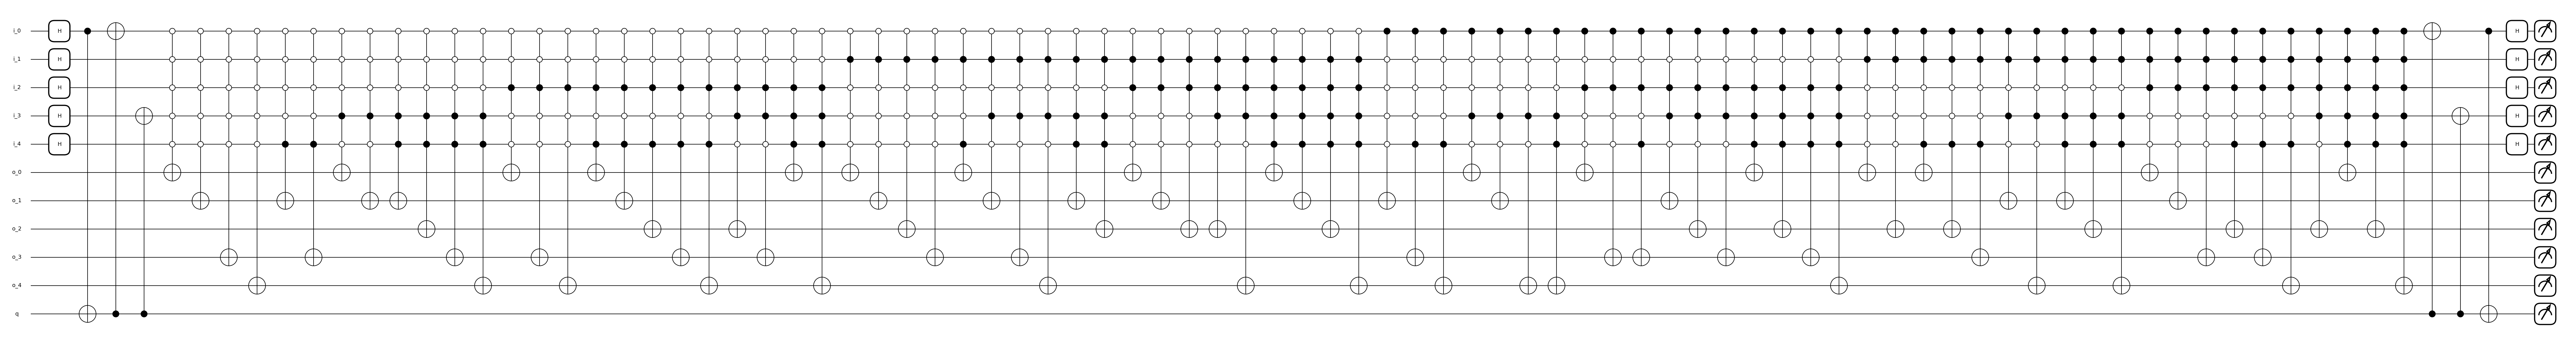

In [8]:
N = 5
dev = qml.device("default.qubit", wires=[*[f"{l}_{x}" for l in "io" for x in range(N)],"q"],shots = 100)

m = [[1 if i==j else 0 for i in range(2**N)] for j in range(2**N)]
rd.shuffle(m)


b = rd.randint(1,2**N-1)
b = f'{b:0{N}b}'
i = rd.choice([i for i in range(N) if b[i]=='1'])
print(b,i)

# Création du circuit

@qml.qnode(dev)
@qml.compile()
def circuit():
    #qml.BasisStatePreparation([0,1,0],wires = dev.wires[:N])
    qml.broadcast(qml.Hadamard,wires = dev.wires[:N],pattern = "single")
    Reductor(N,b,i,dev.wires)
    HashFunction(N,m,dev.wires)
    inverse_Reductor(N,b,i,dev.wires)
    qml.broadcast(qml.Hadamard,wires = dev.wires[:N],pattern = "single")

    return (qml.sample())
qml.draw_mpl(circuit)()

#### Algorithme de Simon
 
l'algorithme de Simon est construit de la manière suivante : 

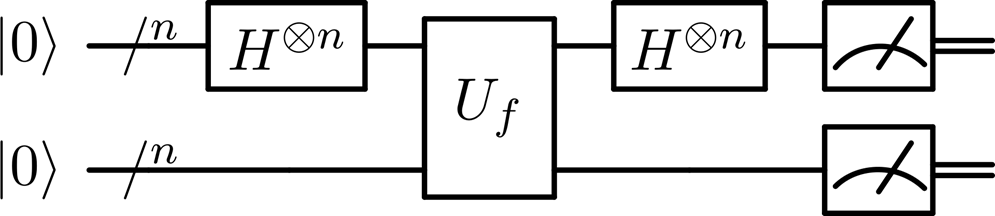

Des portes d'Hadamard sont mises sur les qubits d'entrées, avant et après la fonction $Uf$. Tous les qubits sont ensuites mesurés.
La fonction $Uf$ est **two to one** si $s \ne 0$, sinon  $Uf$ est une fonction **one to one**.

Le fonctionnement est le suivant, prenons un exemple à $2$ qubits : 

- Les portes d'Hadamard permettre d'attendre l'état suivant avant la fonction $Uf$ :  $(|00> + |01> +|10> +|11>)$
- on mesure la sortie et obtient un $f(|x,y>)$. ici x correspond à l'état du premier qubit et y à l'était du deuxième. 

- si $s=0$, alors ça veut dire que la fonction est injective et qu'il n'existe qu'une seule entrée pouvant resulter en ce $f(|x,y>)$, noté $|x,y>$. 
Dans ce cas comme $|x,y>$ peut correspondre à n'importe quel état, les portes d'Hadamards post-$Uf$ résultent en l'état suivant : $(|00> + |01> +|10> +|11>)$

- si $s \ne 0$, par exemple $s = 10$, alors il existe deux cas possible en entrée : $|x,y>$ ou $|x \oplus 1,y>$. 
On peut réécrire ceci de la manière suivante : $(|0>+|1>)|y>$.
Après les portes d'Hadamard on obtient donc l'état suivant $|00> +|01>$.

On peut donc avec la méthode de Simon déterminer directement $s$ en mesurant les qubits d'entrées. 


Pour retrouver $s$, on procède de la manière suivante : 

- On execute Simon $t$ fois. Pour chacune de ses executions on garde les mesures des qubits d'entrée, par exemple avec 5 qubits : 

10101

00101

11101

00010

11010

Chacun de ses états $yk$ va respecter la propriété suivante $yk . s = 0 mod 2$.

On obtient donc un système qu'on peut résoudre, ici on obtient $s=00101$, qui est effectivement le $s$ qui avait été choisi. 


In [ ]:
analyzed_inputs=set()
for c in circuit():
        analyzed_inputs.add(tuple(map(int,c[:N])))

analyzed_inputs=list(analyzed_inputs)   

analyzed_inputs.sort(key = lambda x : sum(x))

for elem in analyzed_inputs :
      print(elem)     

## Conclusion

## Références 

- L. K. Grover, « A fast quantum mechanical algorithm for database search », null, 1996, doi: 10.1145/237814.237866.

- R. Preston, « Applying Grover’s Algorithm to Hash Functions: A Software Perspective », IEEE Transactions on Quantum Engineering, 2022, doi: 10.1109/tqe.2022.3233526.

- I. Damgård, « Collision free hash functions and public key signature schemes », null, 1987, doi: 10.1007/3-540-39118-5_19.

- D. R. Simon, « On the Power of Quantum Computation », SIAM Journal on Computing, 1997, doi: 10.1137/s0097539796298637.

- G. Brassard, P. Høyer, P. F. Hoyer, et A. Tapp, « Quantum Algorithm for the Collision Problem », arXiv: Quantum Physics, 2008, doi: 10.1007/bfb0054319.

